In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("Traffic_Data.csv", sep = ",")

# Convert Date column to datetime
df.loc[:, 'Date'] = pd.to_datetime(df['Datetime'])

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]

# Get month of each sample
df['month'] = df['date'].dt.month

# Sort by datetime
df.sort_values(by='date', inplace=True, ascending=True)

df.head()

,id,datetime,count,date,month
168,168,01-09-2012 00:00,8,2012-01-09 00:00:00,1
169,169,01-09-2012 01:00,4,2012-01-09 01:00:00,1
170,170,01-09-2012 02:00,4,2012-01-09 02:00:00,1
171,171,01-09-2012 03:00,2,2012-01-09 03:00:00,1
172,172,01-09-2012 04:00,2,2012-01-09 04:00:00,1


Text(0, 0.5, 'Traffic Count')

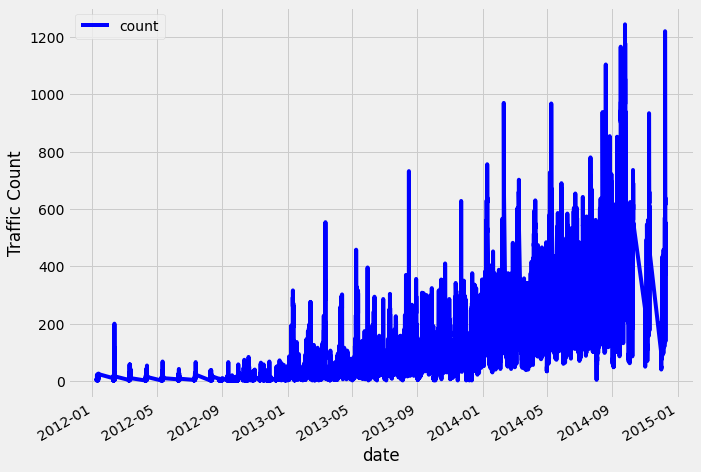

In [3]:
# Plot adjusted close over time
from pylab import rcParams

rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = df.plot(x='date', y='count', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("Traffic Count")

In [4]:
dates=list(df['date'])
adj_closes=list(df['count'])

y = pd.Series(adj_closes, index =dates)
print(y)

# The 'MS' string groups the data in buckets by start of the month
y = y.resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

2012-01-09 00:00:00      8
2012-01-09 01:00:00      4
2012-01-09 02:00:00      4
2012-01-09 03:00:00      2
2012-01-09 04:00:00      2
                      ... 
2014-12-09 19:00:00    536
2014-12-09 20:00:00    484
2014-12-09 21:00:00    368
2014-12-09 22:00:00    410
2014-12-09 23:00:00    368
Length: 18288, dtype: int64
2012-01-01      9.104167
2012-02-01     17.500000
2012-03-01     12.604167
2012-04-01     10.750000
2012-05-01     12.083333
2012-06-01      9.333333
2012-07-01     11.020833
2012-08-01      5.848485
2012-09-01      5.522727
2012-10-01     12.887681
2012-11-01     12.549242
2012-12-01     15.981884
2013-01-01     40.688172
2013-02-01     46.833333
2013-03-01     43.037634
2013-04-01     53.213889
2013-05-01     65.811828
2013-06-01     65.783333
2013-07-01     72.250000
2013-08-01     95.193548
2013-09-01    103.069444
2013-10-01    113.220430
2013-11-01    119.061111
2013-12-01    119.373656
2014-01-01    201.464286
2014-02-01    221.346667
2014-03-01    205.616071


In [5]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [6]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:464.39726170403594
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:313.93653314422465
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:301.63469471212255
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:149.86826723664694
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:270.85009804863193
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:261.75506680392675
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:143.10998353643288
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:133.61882056590804
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:412.9896877701727
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:277.38534581733416
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:265.21585382771553
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:126.73615413689184
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:256.71296641689736
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:239.9088767918996
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:137.72939533605046
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:128.7299168680108
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:324.1868393300169
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:220.97044539558

In [7]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0368      0.869     -0.042      0.966      -1.741       1.667
ma.S.L12       0.9920    820.614      0.001      0.999   -1607.381    1609.365
sigma2      1029.6523    8.4e+05      0.001      0.999   -1.64e+06    1.65e+06


In [8]:
pred = results.get_prediction(start=pd.to_datetime('2013-05-01'), dynamic=False)
pred_ci = pred.conf_int()

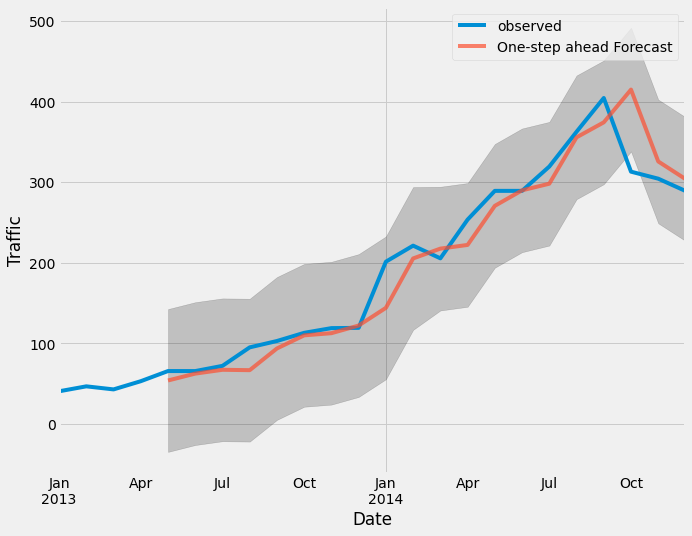

In [9]:
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Traffic')
plt.legend()

plt.show()

In [10]:
y_forecasted = pred.predicted_mean
y_truth = y['2013-05-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 928.69


In [11]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-05-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

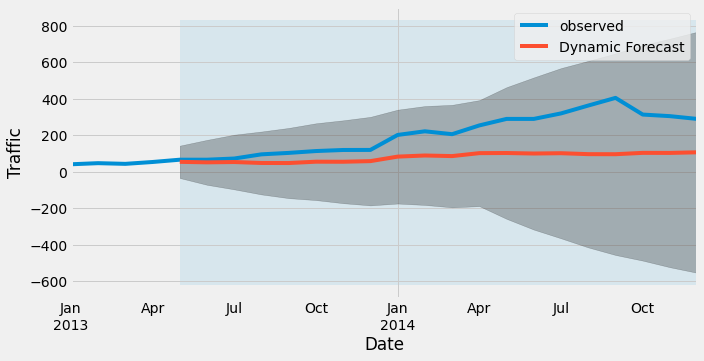

In [12]:
ax = y['2013':].plot(label='observed', figsize=(10, 5))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2013-05-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Traffic')

plt.legend()
plt.show()

In [13]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2013-05-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 24457.85


In [14]:
# Get forecast 100 steps ahead in future
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

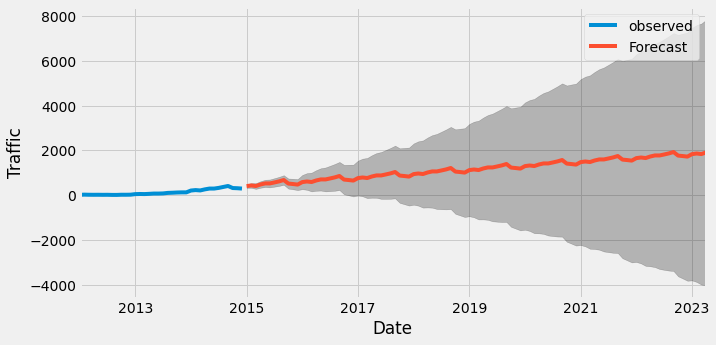

In [15]:
ax = y.plot(label='observed', figsize=(10,5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic')

plt.legend()
plt.show()